# **1-import libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re  
import string
import nltk
from nltk.corpus import stopwords #for cleaning 
from nltk.stem import LancasterStemmer ##for cleaning 
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df = pd.concat([train, test], ignore_index=True).reset_index(drop=True)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# **2-Preprocessing**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Search for the numeric and object values that have NaN values

In [5]:
numeric_columns_with_null = train.select_dtypes(include=['number']).columns[train.select_dtypes(include=['number']).isnull().any()]
numeric_columns_with_null

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [6]:
object_columns_with_null = train.select_dtypes(exclude=['number']).columns[train.select_dtypes(exclude=['number']).isnull().any()]
object_columns_with_null

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

## Fill the object Nan values  

In [7]:
train["Alley"]= train["Alley"].fillna("No alley")
train["MasVnrType"]= train["MasVnrType"].fillna("unknown")
train["BsmtQual"]= train["BsmtQual"].fillna("No Basement")
train["BsmtCond"]= train["BsmtCond"].fillna("No Basement")
train["BsmtExposure"]= train["BsmtExposure"].fillna("No Basement")
train["BsmtFinType1"]= train["BsmtFinType1"].fillna("No Basement")
train["BsmtFinType2"]= train["BsmtFinType2"].fillna("No Basement")
train["Electrical"]= train["Electrical"].fillna("unknown")
train["FireplaceQu"]= train["FireplaceQu"].fillna("No Fireplace'")
train["GarageType"]= train["GarageType"].fillna("No Garage")
train["GarageFinish"]= train["GarageFinish"].fillna("No Garage")
train["GarageQual"]= train["GarageQual"].fillna("No Garage")
train["GarageCond"]= train["GarageCond"].fillna("No Garage")
train["PoolQC"]= train["PoolQC"].fillna("No Pool")
train["Fence"]= train["Fence"].fillna("No Fence")
train["MiscFeature"]= train["MiscFeature"].fillna("unknown")


test["Alley"]= test["Alley"].fillna("No alley")
test["MasVnrType"]= test["MasVnrType"].fillna("unknown")
test["BsmtQual"]= test["BsmtQual"].fillna("No Basement")
test["BsmtCond"]= test["BsmtCond"].fillna("No Basement")
test["BsmtExposure"]= test["BsmtExposure"].fillna("No Basement")
test["BsmtFinType1"]= test["BsmtFinType1"].fillna("No Basement")
test["BsmtFinType2"]= test["BsmtFinType2"].fillna("No Basement")
test["Electrical"]= test["Electrical"].fillna("unknown")
test["FireplaceQu"]= test["FireplaceQu"].fillna("No Fireplace'")
test["GarageType"]= test["GarageType"].fillna("No Garage")
test["GarageFinish"]= test["GarageFinish"].fillna("No Garage")
test["GarageQual"]= test["GarageQual"].fillna("No Garage")
test["GarageCond"]= test["GarageCond"].fillna("No Garage")
test["PoolQC"]= test["PoolQC"].fillna("No Pool")
test["Fence"]= test["Fence"].fillna("No Fence")
test["MiscFeature"]= test["MiscFeature"].fillna("unknown")

## Fill the numeric Nan values

In [8]:
numeric_columns = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]  
numeric_imputer = SimpleImputer(strategy='mean')

train[numeric_columns] = numeric_imputer.fit_transform(train[numeric_columns])
test[numeric_columns] = numeric_imputer.transform(test[numeric_columns])


In [9]:
Object1_columns = train.select_dtypes(include=['object']).columns
Object2_columns = test.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in Object1_columns:
    print(column)
    train[column] = label_encoder.fit_transform(train[column])

for column in Object2_columns:
    print(column)
    test[column] = label_encoder.fit_transform(test[column])

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


# **3-EDA**

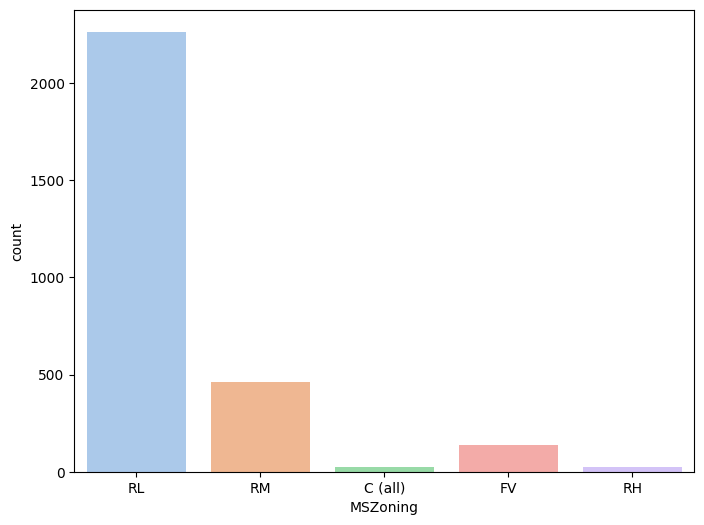

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x="MSZoning", data=df, palette="pastel")
plt.show()

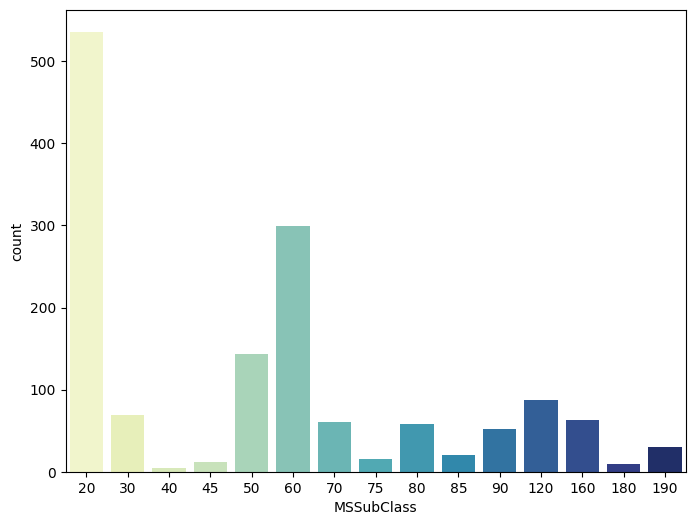

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x="MSSubClass", data=train, palette="YlGnBu")
plt.show()

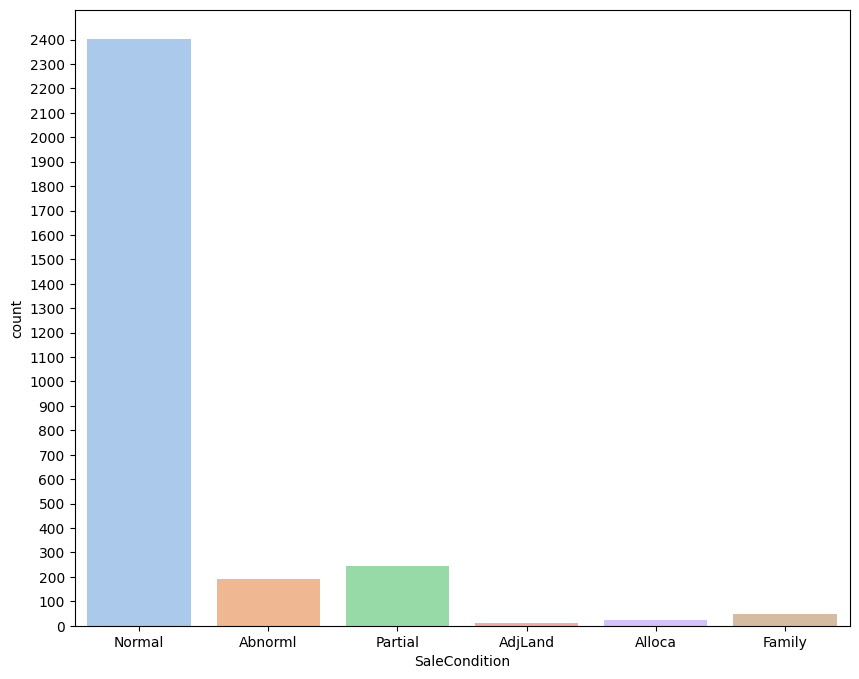

In [12]:
plt.figure(figsize=(10, 8))
sns.countplot(x="SaleCondition", data=df, palette="pastel")
plt.yticks(np.arange(0,2500,100))
plt.show()

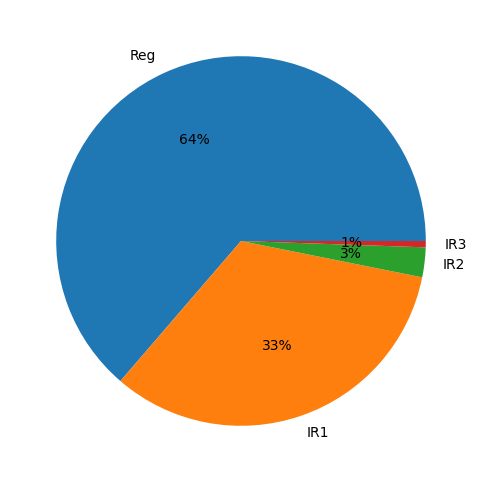

In [13]:
plt.figure(figsize=(8, 6))
kind_counts = df["LotShape"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

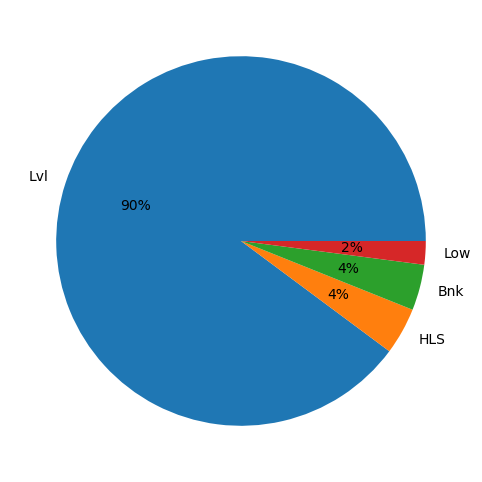

In [14]:
plt.figure(figsize=(8, 6))
kind_counts = df["LandContour"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

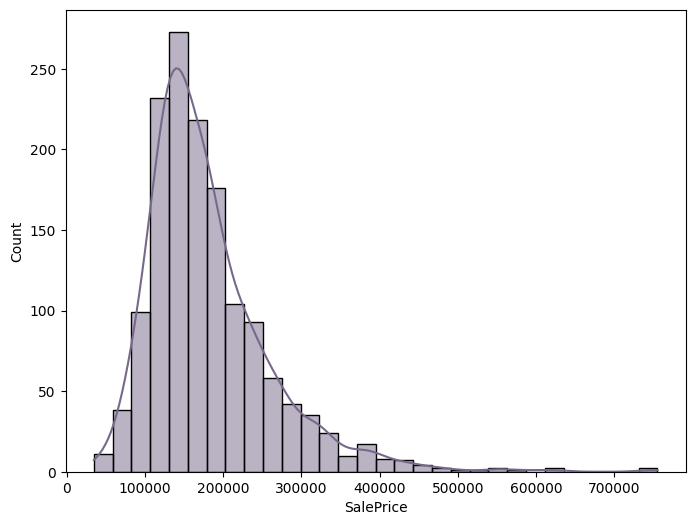

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True, color='#76698a')
plt.show()

# **4-Make the model**

In [16]:
X_train = train.drop(columns=["SalePrice"])
Y_train  = train["SalePrice"]

In [17]:
for column in X_train.columns:
    unique_values = X_train[column].unique()
    print(f"{column}: {unique_values}")

Id: [   1    2    3 ... 1458 1459 1460]
MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning: [3 4 0 1 2]
LotFrontage: [ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          72.          66.         101.
  57.          44.         110.          98.          47.
 108.         112.          74.         115.          61.
  48.          33.          52.         100.          24.
  89.          63.          76.          81.          95.
  69.          21.          32.          78.         121.
 122.          40.         105.          73.          77.
  64.          94.          34.          90.          55.
  88.          82.          71.         120.         107.
  92.         134.          62.          86.         141.
  97.          54.          41.          79.         174.
  99.          67.          83.          43.         103.
  93.          30.         129.        

In [32]:
X2_train = X_train.drop(columns=["Id"])

In [33]:
model = LinearRegression()
model.fit(X2_train ,Y_train)

LinearRegression()

In [34]:
model.score(X2_train ,Y_train)

0.8537758291411436